# California Housing Dataset - Phase 1: Data Preparation and EDA
### MSCS 634 Project Deliverable 1

## 1. Dataset Selection and Justification
**Dataset Source**: California Housing Dataset via Scikit-learn (originally from the 1990 U.S. Census)

**Attributes**: 9 (8 features + 1 target)
**Records**: 20,640

This dataset is appropriate because it:
- Contains 8 attributes and more than 20,000 records
- Represents real-world housing and socioeconomic data
- Supports robust regression analysis and geographic modeling
- Encourages practice with feature scaling, outlier detection, and predictive modeling

In [1]:
# Load required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
# Load California Housing Dataset
california = fetch_california_housing(as_frame=True)
data = california.frame

## 2. Initial Data Inspection
Checking structure, missing values, and duplicates.

In [3]:
# View data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Check for missing values and duplicates
print('Missing values:', data.isnull().sum().sum())
print('Duplicate rows:', data.duplicated().sum())

Missing values: 0
Duplicate rows: 0


## 3. Data Cleaning
**Findings**:
- No missing values found
- No duplicate rows
- Will analyze for outliers and inconsistent (noisy) values next

In [ ]:
# Descriptive statistics 
# Note: this is a summary of the data
# - Indentify range
# - Indentify centrality
# - Indentify variance
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 4. Exploratory Data Analysis (EDA)
- Correlation analysis
- Distribution plots
- Boxplots to detect outliers

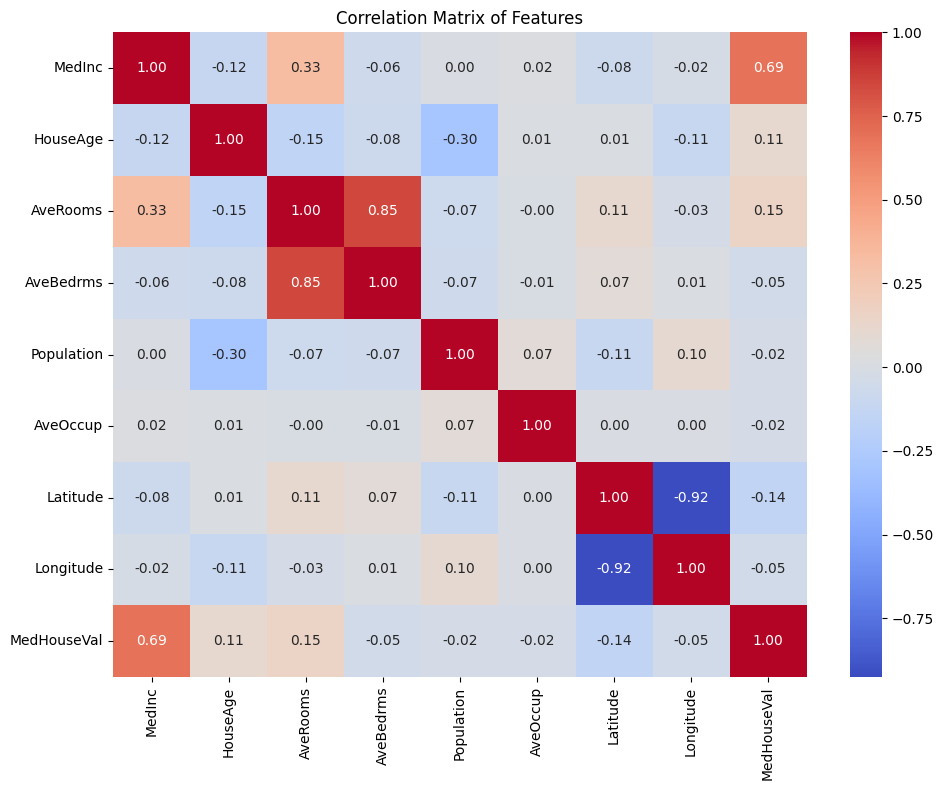

In [6]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

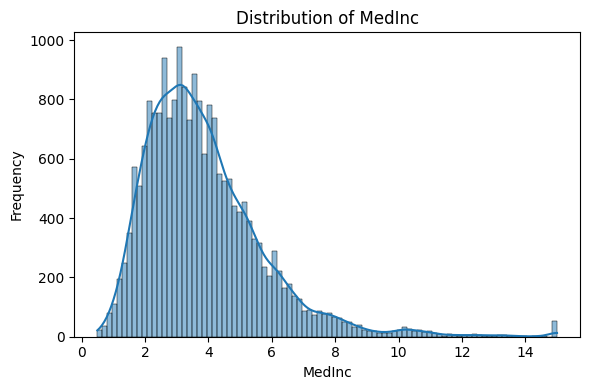

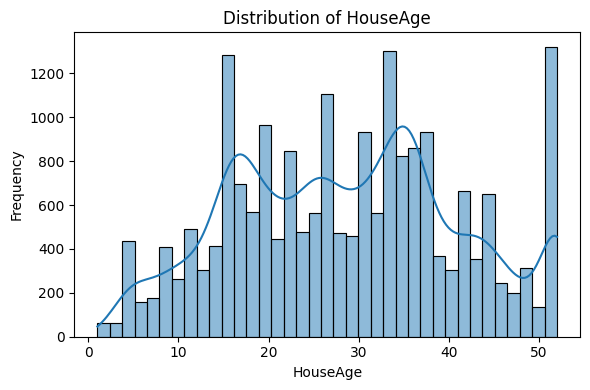

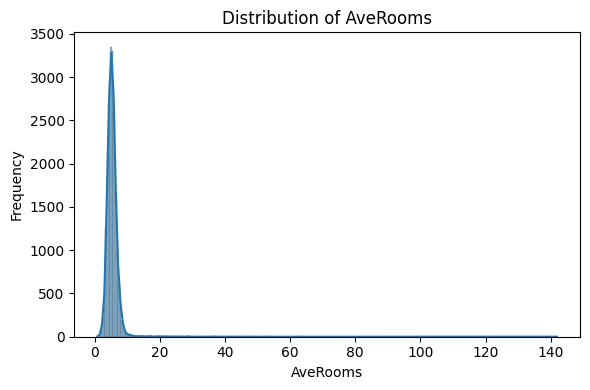

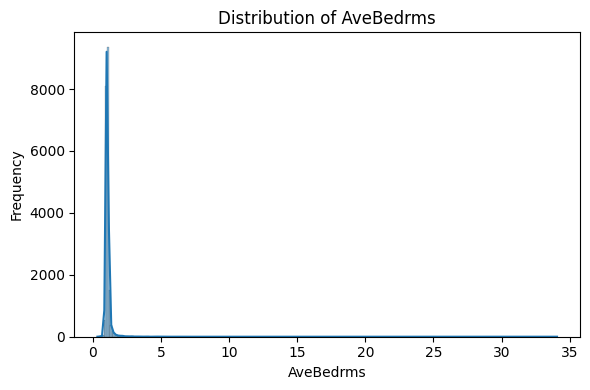

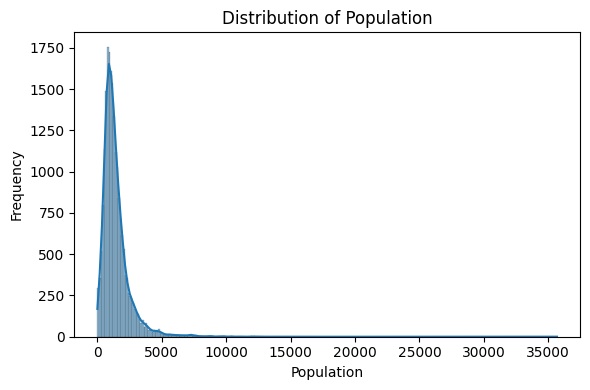

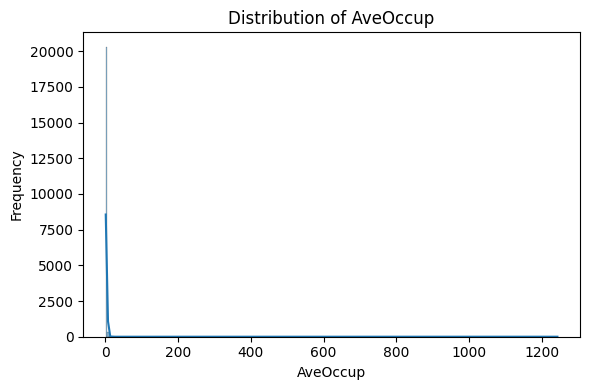

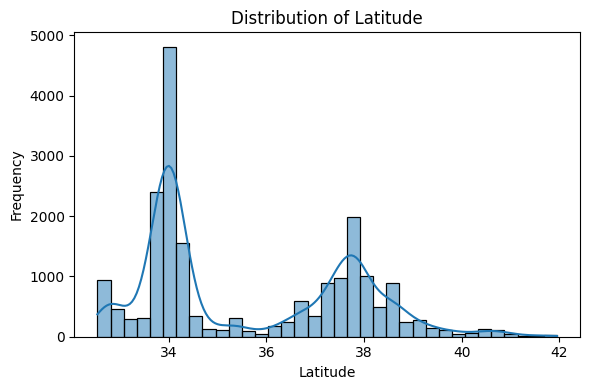

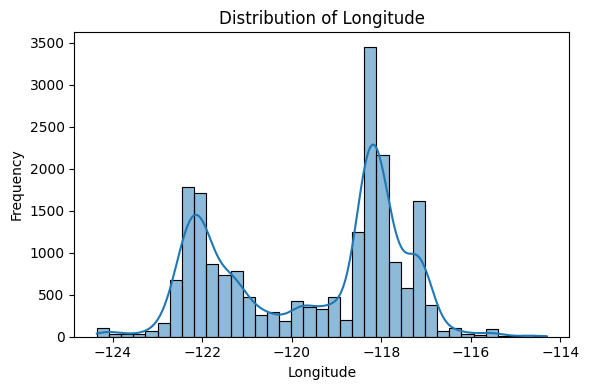

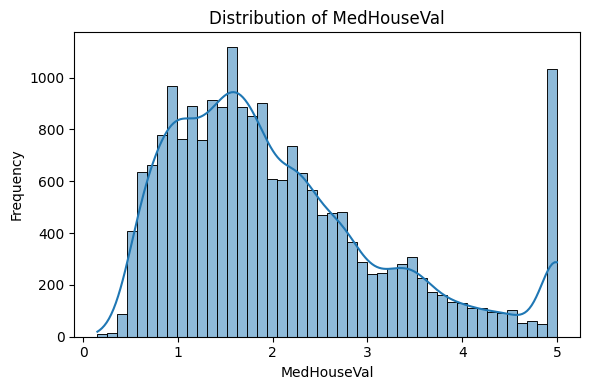

In [7]:
# Distribution plots with KDE
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

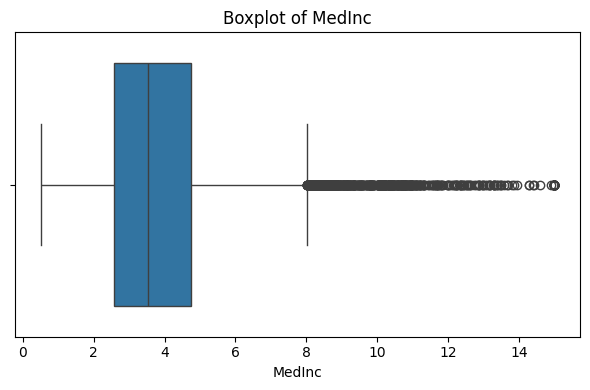

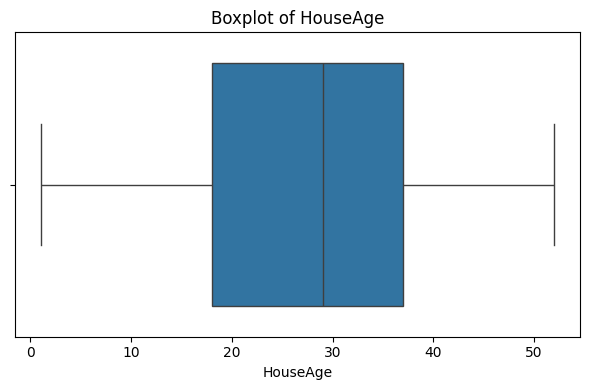

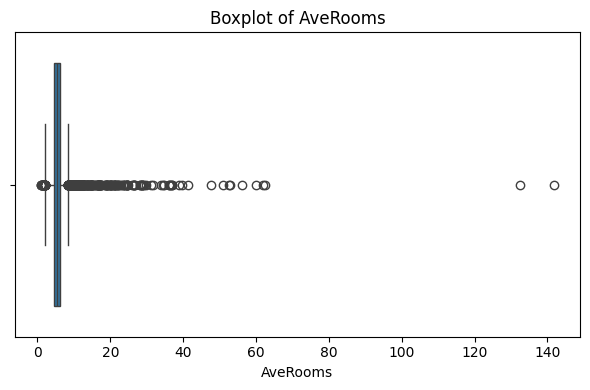

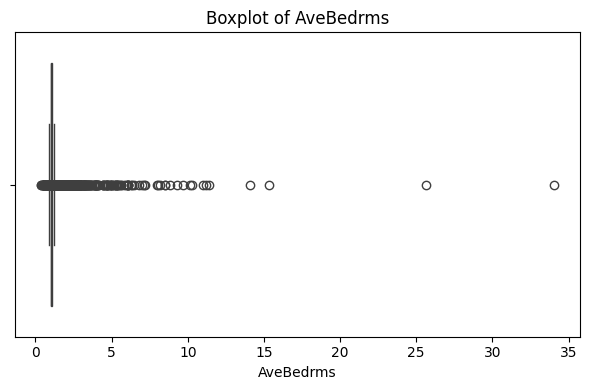

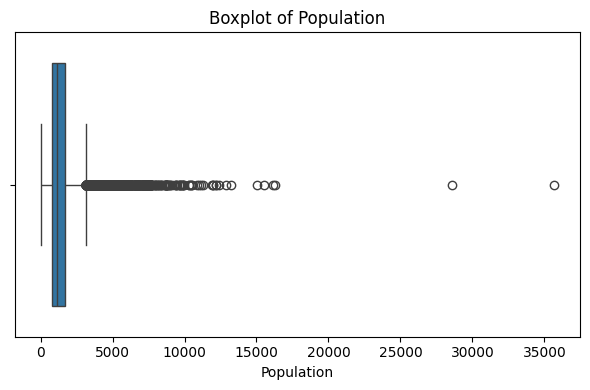

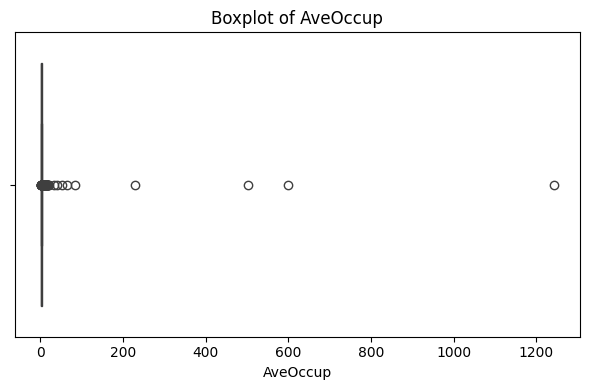

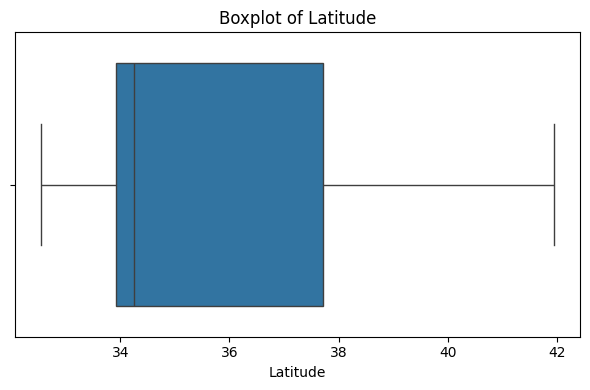

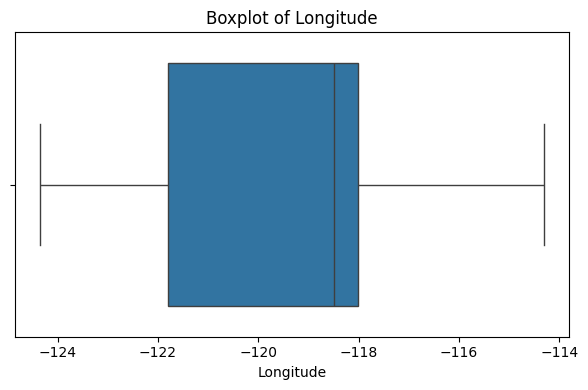

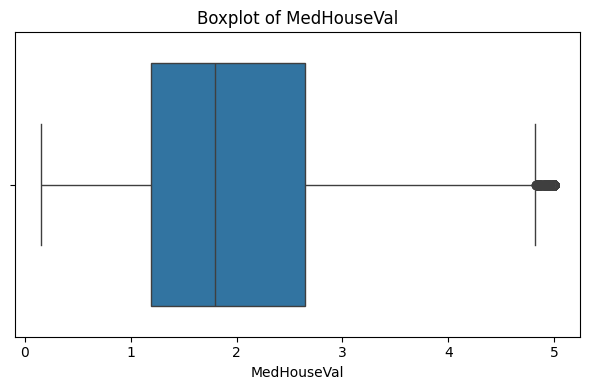

In [8]:
# Boxplots for outlier detection
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

## 5. Insights and Impact on Modeling
## Note: This is very preliminary exploration
- **MedInc (median income)** has a strong positive correlation with `MedHouseVal` (median house value)
- **AveRooms** and **AveOccup** show right-skewed distributions and outliers
- Variables like **HouseAge**, **AveOccup**, and **Population** may require transformation
- No data imputation was needed, but normalization and scaling will and should be considered next

These insights will guide preprocessing choices and feature engineering for regression modeling in the next phase.